<a href="https://colab.research.google.com/github/arthireddy14/Datasets_practice/blob/main/amazon_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Task 1 — Load & Inspect the Dataset
Load the dataset into your notebook.
Display first and last 5 rows.
Print .shape and .info().
Show list of unique product categories.
Identify columns that require cleaning or type conversion.

In [5]:
df=pd.read_csv('amazon_products_dataset.csv')
df


,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0


In [6]:
print(df.head())
print(df.tail())
print(df.shape)
print(df.info())
print(df.dtypes)

                     title    brand    category  actual_price  discount_price  \
0      Smart Fitness Watch     Dell      Laptop       69890.0         65271.0   
1  Laptop with SSD Storage       LG  Smartwatch       66771.0         63977.0   
2  High Resolution Monitor       Mi  Headphones       43598.0         39679.0   
3         4K Action Camera       HP      Camera       63408.0         58877.0   
4      Smart Fitness Watch  Samsung     Monitor       49224.0         45017.0   

   rating  rating_count  
0     2.6        2128.0  
1     2.5        9118.0  
2     1.9        2517.0  
3     3.7       17533.0  
4     4.9       14228.0  
                               title    brand    category  actual_price  \
1995  Smartphone with AMOLED Display     Dell     Monitor       24140.0   
1996             Smart Fitness Watch       LG  Headphones       65449.0   
1997                4K Action Camera     Dell  Smartphone       21358.0   
1998        Noise Cancelling Earbuds  OnePlus  Smartwatch

In [7]:
print(df['category'].unique())
print(df['category'].nunique())

['Laptop' 'Smartwatch' 'Headphones' 'Camera' 'Monitor' 'Speaker' 'Tablet'
 'Smartphone' nan]
8


In [8]:
df.dtypes

,0
title,object
brand,object
category,object
actual_price,float64
discount_price,float64
rating,float64
rating_count,float64


Task 2 — Clean the Dataset
Identify missing values using .isnull().sum().
Fill missing numeric values (discount_price, rating, etc.) using mean or median.
Fill missing categorical values (brand, category) with "Unknown".
Remove all duplicate rows.
Convert numeric columns to their correct data types.
Reset index after cleaning.


In [9]:

df.isnull().sum()

,0
title,0
brand,0
category,2
actual_price,2
discount_price,1
rating,4
rating_count,4


In [ ]:
num_cols=['discount_price','actual_price','rating','rating_count']
df[num_cols]=df[num_cols].fillna(df[num_cols].mean())

In [ ]:
category_values=['brand','category']
df[category_values]=df[category_values].fillna("Unknown")

In [ ]:
print(df.drop_duplicates())
df.reset_index(drop=True,inplace=True)

                               title    brand    category  actual_price  \
0                Smart Fitness Watch     Dell      Laptop       69890.0   
1            Laptop with SSD Storage       LG  Smartwatch       66771.0   
2            High Resolution Monitor       Mi  Headphones       43598.0   
3                   4K Action Camera       HP      Camera       63408.0   
4                Smart Fitness Watch  Samsung     Monitor       49224.0   
...                              ...      ...         ...           ...   
1995  Smartphone with AMOLED Display     Dell     Monitor       24140.0   
1996             Smart Fitness Watch       LG  Headphones       65449.0   
1997                4K Action Camera     Dell  Smartphone       21358.0   
1998        Noise Cancelling Earbuds  OnePlus  Smartwatch       35229.0   
1999  Smartphone with AMOLED Display     Boat  Headphones       31662.0   

      discount_price  rating  rating_count  
0            65271.0     2.6        2128.0  
1        

In [ ]:
df.isnull().sum()

,0
title,0
brand,0
category,0
actual_price,0
discount_price,0
rating,0
rating_count,0


In [ ]:
df.shape

(2000, 7)

Task 3 — Data Analysis
Identify the top 5 most expensive products (actual_price).
Find the brand with the highest number of products.
Compute the average discount percentage for each brand.
Identify products with rating ≥ 4.5 and rating_count ≥ 2000.
Compute category-wise average price.


In [ ]:
df.sort_values(by='actual_price',ascending=False).head()

,title,brand,category,actual_price,discount_price,rating,rating_count
1383,Android Tablet,JBL,Laptop,79993.0,78094.0,3.0,7666.0
1974,Gaming Laptop,LG,Monitor,79869.0,77173.0,2.6,5232.0
1403,4K Action Camera,Sony,Headphones,79857.0,77469.0,2.7,1379.0
1351,Android Tablet,Sony,Monitor,79853.0,78831.0,4.8,7596.0
42,Gaming Laptop,Apple,Smartwatch,79826.0,76919.0,3.8,10252.0


In [ ]:
# df.groupby('brand')['products'].sum()
top_brand = df['brand'].value_counts().idxmax()
top_brand_count = df['brand'].value_counts().max()

top_brand, top_brand_count


('Boat', 214)

In [ ]:
df['discount_per']=(df['actual_price']-df['discount_price']/df['actual_price']*100)
df.groupby('brand')['discount_per'].mean().sort_values(ascending=False)


,discount_per
brand,
OnePlus,41416.072164
HP,40899.962367
Samsung,40217.000134
Dell,39916.780823
JBL,39748.515064
Sony,39406.425080
Mi,38834.692695
Boat,38688.060521
Apple,38395.327259


In [ ]:
highest_rated=df[(df['rating']>=4.5) & (df['rating_count']>=2000)]
highest_rated

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_per
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,49132.546644
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0,7716.610933
51,Wireless Bluetooth Headphones,Dell,Headphones,61569.0,59372.0,4.5,13402.0,61472.568354
52,Laptop with SSD Storage,Boat,Smartwatch,76286.0,75621.0,5.0,7433.0,76186.871720
59,Gaming Laptop,Samsung,Tablet,45250.0,44710.0,4.7,4643.0,45151.193370
...,...,...,...,...,...,...,...,...
1949,Portable Bluetooth Speaker,OnePlus,Tablet,59325.0,55777.0,4.5,19070.0,59230.980615
1970,Android Tablet,Boat,Camera,20841.0,17765.0,4.5,10252.0,20755.759369
1975,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0,31888.372345
1982,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0,15272.518347


In [ ]:
category_wise_avgprice=df.groupby('category')['actual_price'].mean().sort_values(ascending=False)
category_wise_avgprice

,actual_price
category,
Laptop,40822.874477
Camera,40352.246094
Monitor,39949.431596
Tablet,39943.815217
Speaker,39683.449141
Headphones,39576.147679
Smartwatch,38316.913934
Smartphone,37909.529412
Unknown,33610.500000


Task 4 — Programming Task: Feature Engineering + Logical Filters
Task 4A — Create New Columns
Write code to create:
discount_percent = ((actual_price - discount_price) / actual_price) * 100
price_category based on:
actual_price < 500 → "Budget"
500 ≤ price < 2000 → "Midrange"
price ≥ 2000 → "Premium"
popularity_score = rating * log(rating_count + 1)

In [ ]:
def price_cat(price):
  if price<500:
    return "Budget"
  elif price>=500 and price<2000:
    return "Midrange"
  else:
    return "Premium"
df['price_category']=df['actual_price'].apply(price_cat)


In [ ]:
df['popularity_score']=df['rating']* np.log(df['rating_count']+1)

Task 4B — Filtering Using New Columns
Using the newly created columns:
Show top 10 highest popularity_score products.
Show all Premium category items with discount_percent > 40%.
Show all products whose title contains "Bluetooth" (string filter).
Show products where:
rating >= 4.0
discount_percent between 20% to 50%
popularity_score in the top 30% percentile
(Use .between() and .quantile())

In [ ]:
df['popularity_score'].sort_values(ascending=False).head(10)

,popularity_score
1418,49.130602
297,48.928304
502,48.625690
1400,48.388891
878,48.248857
1489,48.240292
848,48.157775
854,48.040676
1625,47.848110
637,47.803700


In [ ]:
premium_cat_dis40=df[
    (df['category']=='Premium') &
    (df['discount_per']>40)
]
premium_cat_dis40

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_per,price_category,popularity_score


In [ ]:
bluetooth_devices=df[df['title'].str.contains("bluetooth",case=True,na=False)]
bluetooth_devices


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_per,price_category,popularity_score


In [ ]:
popularity_threshold=df['popularity_score'].quantile(0.7)
filtered_products = df[
    (df['rating'] >= 4.0) &
    (df['discount_per'].between(20, 50)) &
    (df['popularity_score'] >= popularity_threshold)
]

filtered_products


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_per,price_category,popularity_score



Task 4C — Grouping with New Columns
Find the average discount_percent for each brand.
Find the average popularity_score for each price_category.
Identify which category offers the highest average discount.
Calculate total revenue potential per brand using:
revenue_potential = actual_price * rating_count


In [ ]:
discount_per_bybrand=df.groupby('brand')['discount_per'].mean().sort_values(ascending=False)
discount_per_bybrand

,discount_per
brand,
OnePlus,41416.072164
HP,40899.962367
Samsung,40217.000134
Dell,39916.780823
JBL,39748.515064
Sony,39406.425080
Mi,38834.692695
Boat,38688.060521
Apple,38395.327259


In [ ]:
avg_pop_pricecat=df.groupby('price_category')['popularity_score'].mean().sort_values(ascending=False)
avg_pop_pricecat

,popularity_score
price_category,
Budget,38.147220
Premium,26.366914
Midrange,23.660324


In [ ]:
category_dis_highest=df.groupby('category')['discount_per'].mean().sort_values(ascending=False)
category_dis_highest.head(1)

,discount_per
category,
Laptop,40734.082032


In [ ]:
df['revenue_potential']=df['actual_price']*df['rating_count']
brand_by_revenue=df.groupby('brand')['revenue_potential'].sum().sort_values(ascending=False)
brand_by_revenue

,revenue_potential
brand,
HP,8.297444e+10
OnePlus,8.247380e+10
LG,8.158494e+10
Samsung,8.117230e+10
Sony,7.930446e+10
Boat,7.744874e+10
JBL,7.723438e+10
Mi,7.698029e+10
Dell,7.549826e+10


Task 5 — Data Visualization
Use the specific plot type mentioned:
Price distribution → Histogram + KDE
Relationship between price and rating → Scatter Plot
Category-wise average rating → Bar Plot
Brand product count → Count Plot
Numeric feature correlations → Heatmap

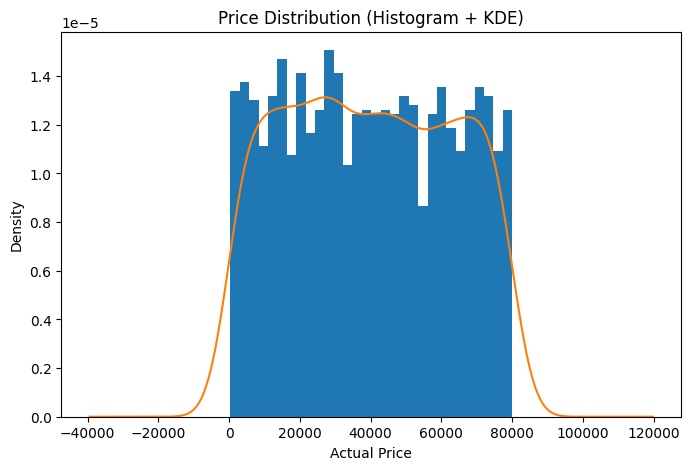

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['actual_price'].dropna(), bins=30, density=True)
df['actual_price'].dropna().plot(kind='kde')
plt.title("Price Distribution (Histogram + KDE)")
plt.xlabel("Actual Price")
plt.ylabel("Density")
plt.show()


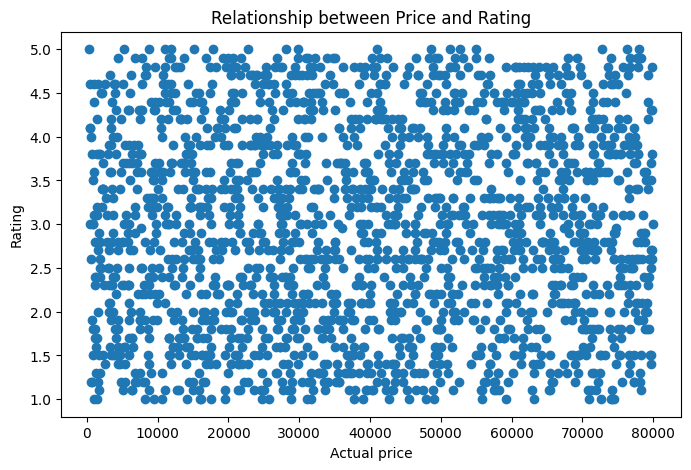

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['actual_price'],df['rating'])
plt.title("Relationship between Price and Rating")
plt.xlabel("Actual price")
plt.ylabel("Rating")
plt.show()

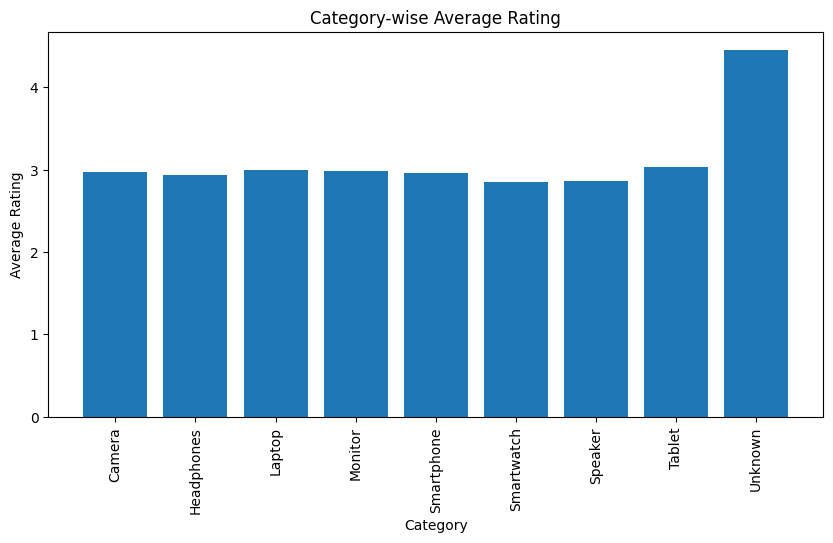

In [ ]:
cat_avg = df.groupby('category')['rating'].mean().dropna()

plt.figure(figsize=(10,5))
plt.bar(cat_avg.index, cat_avg.values)
plt.xticks(rotation=90)
plt.title("Category-wise Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()


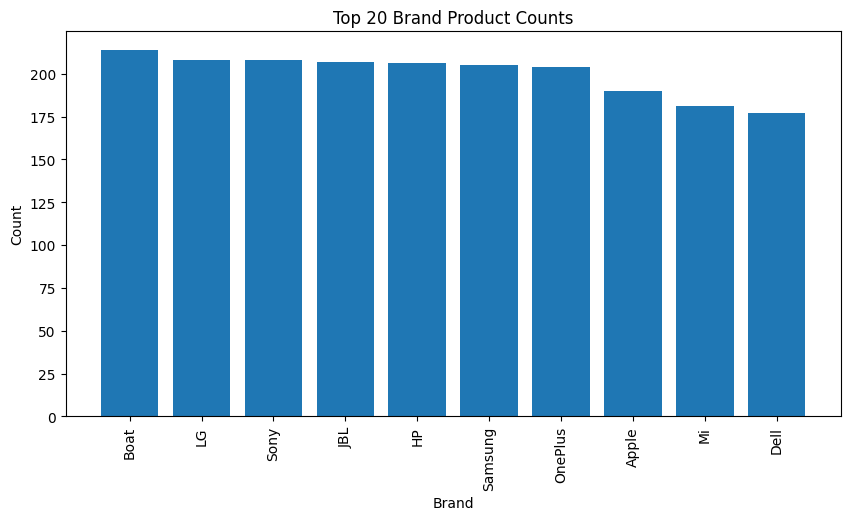

In [ ]:
brand_counts = df['brand'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(brand_counts.index[:20], brand_counts.values[:20])
plt.xticks(rotation=90)
plt.title("Top 20 Brand Product Counts")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()


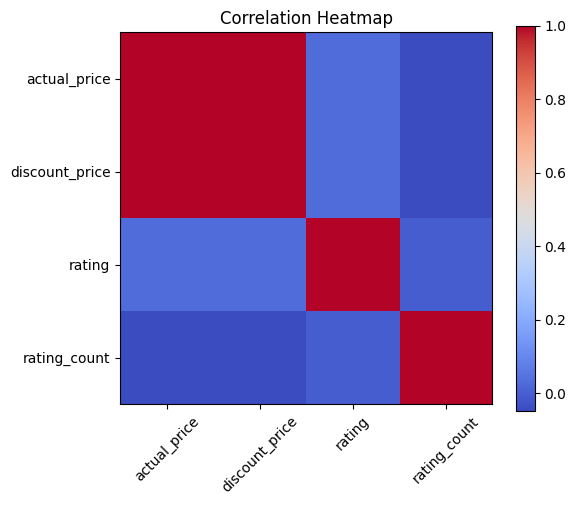

In [ ]:
numeric_cols = ['actual_price', 'discount_price', 'rating', 'rating_count']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.to_csv("C:\\Users\\spoor\\Downloads\\cleaned_Amazon_Products.csv",index=False)